## Second task:
1. Create at least 3 different types of statistical plots and 1 interactive plot to analyze your data. Use seaborn and plotly to visualize them. Draw conclusions and explain why the graphs are useful for analyzing your data.

2. Perform statistical tests for one categorical variable and multiple numeric descriptors. Draw conclusions and interpret your results.

3. Calculate correlation coefficients for your dataset and investigate multicollinearity. Visualize and interpret your results.

4. Choose one linear (except PCA) and one non-linear dimension reduction method. Run them on your data. It is preferable to use seaborn and plotly to visualize results. Justify the choice of the number of components / dimensions and explain them.

## Visualisation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output 
from scipy.stats import ttest_ind
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from matplotlib import cm


In [6]:
df = pd.read_csv("df_final_with_descriptors.csv")
df = pd.DataFrame(df)
df

,Unnamed: 0,Date,Journal,Title,Name,wavelength_added,RI,DOI_alt,SMILES,Method_ord,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,5/25/2011,Physical Chemistry Chemical Physics,Kirkwood correlation factors in liquid mixture...,Triglyme,589.0,1.421120,10.1039/C1CP20142E,COCCOCCOCCOC,1,...,0.946528,0.031934,0.549275,0.526084,0.492699,19.717294,19.944032,44.651635,0.919793,1.568058
1,1,9/13/1999,Journal of Alloys and Compounds,GROWTHOPTICALPROPERTIESREDOPEDBULKFIBERSINGLEC...,YVO4,589.0,2.168000,10.1016/S0925-8388(98)00420-4,[O-2].[O-2].[O-2].[O-2].[V].[Y+3],1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3/4/1999,Colloids and Surfaces A: Physicochemical and E...,ADSORPTIONOILSURFACTANTMONOLAYERSSTRUCTUREMIXE...,Toluene,589.0,1.494000,10.1016/S0927-7757(98)00782-1,CC1=CC=CC=C1,1,...,0.645928,0.332469,0.550605,0.453388,0.125625,5.009615,5.919881,11.512744,0.468892,1.129618
3,3,8/5/2004,Materials Science and Engineering: B,Fabrication of PECVD-silicon oxynitride-based ...,silicon dioxide,589.0,1.460000,10.1016/j.mseb.2004.05.037,O=[Si]=O,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12/1/2016,Optik,OPTIMIZATIONENHANCEMENTLIQUIDANALYTESENSINGPER...,Benzyne,589.0,1.354000,10.1016/j.ijleo.2016.11.171,C1=CC#CC=C1,2,...,0.560564,0.426347,0.464710,0.524683,0.276782,3.839450,3.713540,7.730048,0.480366,1.266175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,2968,7/30/2011,Thermochimica Acta,THERMOPHYSICALSTUDYNHEXANENHEPTANE1CHLOROPROPA...,n-Heptane,589.0,1.390333,10.1016/j.tca.2011.07.023,CCCCCCC,0,...,0.856853,0.086350,0.562047,0.557496,0.590060,8.745269,9.755805,21.311787,0.785279,1.709602
2969,2969,6/9/2015,RSC Adv.,Semitransparent polymer-based solar cells via ...,TiO2,26.0,1.640000,10.1039/C5RA05762K,O=[Ti]=O,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2970,2970,6/17/2015,Phys. Chem. Chem. Phys.,Transformation of photophysical properties fro...,"1,4-Dioxane",589.0,1.420300,10.1039/C5CP02762D,C1COCCO1,0,...,0.552766,0.330474,0.649745,0.843263,0.503156,4.024970,4.630103,10.045862,0.329148,1.996164
2971,2971,4/13/2017,Vibrational Spectroscopy,IMPROVEMENTSTIO2CATALYZEDAGNPSBASEDSERSSUBSTRA...,TiO2,589.0,1.630000,10.1016/j.vibspec.2017.03.005,O=[Ti]=O,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Firstly we will make a visualization with categorical variables like Publisher and Method type.

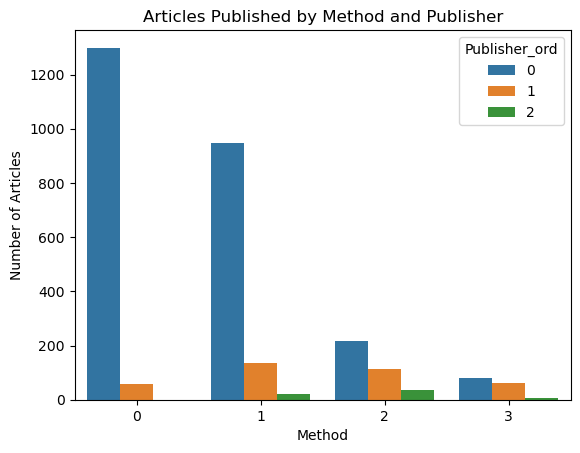

In [7]:
# Group the data by publisher and method, and count the number of articles in each group
df_grouped = df.groupby(['Publisher_ord', 'Method_ord'])['Title'].count().reset_index()

# Create a bar plot with the method on the x-axis, and the number of articles on the y-axis, colored by publisher
sns.barplot(x='Method_ord', y='Title', hue='Publisher_ord', data=df_grouped)

plt.xlabel('Method')
plt.ylabel('Number of Articles')
plt.title('Articles Published by Method and Publisher')

plt.show()

### Conclusions: 
On this plot we can see that method 0 is the most popular in researches and that publisher 0 has the largest number of articles in this sphere. 

Now we will prepare our data for the subsequent visualization of relations only between descriptors with numerical variables. For that we need to make sure that dataset does not have ony NaN or inf values and has only unique values (for better picture). 

In [8]:
# Select only numerical columns
num_cols = df.select_dtypes(include='number').columns.tolist()

# Drop non-numerical columns
df = df[num_cols]

In [9]:
# Check number of unique values in each column
unique_counts = df.nunique()

# Get column names with only one unique value
to_drop = unique_counts[unique_counts == 1].index.tolist()

# Drop columns with only one unique value
df = df.drop(to_drop, axis=1)

In [10]:
df = df.drop(columns= 'Unnamed: 0')

In [11]:
# Replace NaN values with a numerical value (e.g. 0)
df = df.fillna(0)

# Replace inf values with a numerical value (e.g. large positive or negative value)
df = df.replace([np.inf, -np.inf], [np.finfo(np.float64).max, np.finfo(np.float64).min])

In [12]:
df1 = df.groupby(['Method_ord'])['Method_ord'].count()
df1

Method_ord
0    1357
1    1103
2     366
3     147
Name: Method_ord, dtype: int64

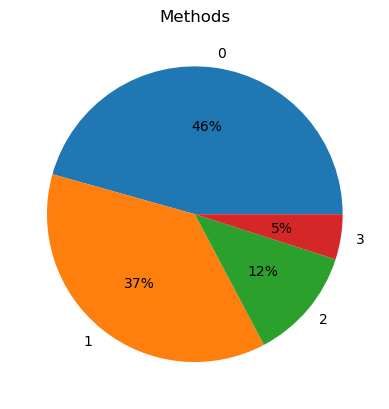

In [13]:
# Count the number of occurrences of each unique value in the column
value_counts = df['Method_ord'].value_counts()

# Create the pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.0f%%')

# Add a title
plt.title('Methods')

# Show the pie chart
plt.show()


### Conclusions: 
Here we can see that method 0 is actually almost as frequently used as method 1.

Text(0.5, 1.0, 'Method_ord')

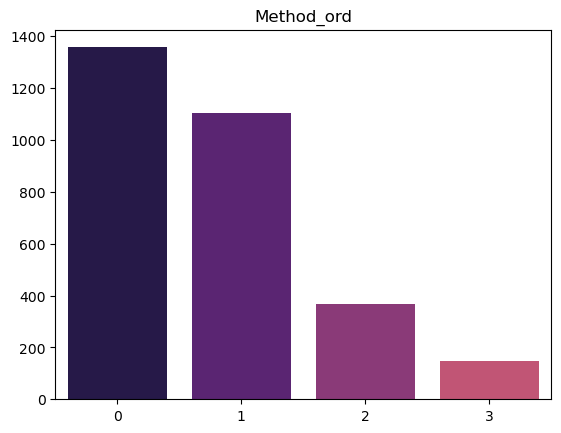

In [14]:
# plot shows which measument methods were used to get refractive indexes for this dataset
df2 = df.groupby(['Method_ord'])['Method_ord'].count().sort_values(ascending=False)
labels = list(df2.keys())
data = list(df2)
sns.barplot(x=labels, y=data, palette=sns.color_palette("magma")).set_title('Method_ord')

### Conclusions: 
We see the same result as with the pie chart. Just another variant of visualisation. 

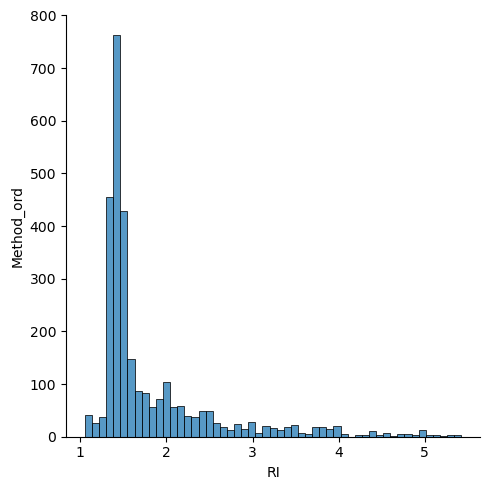

In [15]:
g=sns.displot(df, x='RI')
g.set_axis_labels('RI', 'Method_ord')

### Conclusions: 


For the next step we again need to transform our data: we chose in our opinion the most representative descriptors and want to if there are any interesting relations between them. 

In [16]:
desc = df[['wavelength_added', 'RI','MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount', 'AtomStereoCount']]
#Delete lines from None
desc = desc.dropna()
desc

,wavelength_added,RI,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount,AtomStereoCount
0,589.0,1.421120,178.230,-0.5,178.120509,178.120509,36.9,67.0,0.0,0.0,4.0,9.0,12.0,0.0
1,589.0,2.168000,203.845,0.0,203.829454,203.829454,4.0,0.0,-5.0,0.0,4.0,0.0,6.0,0.0
2,589.0,1.494000,92.140,2.7,92.062600,92.062600,0.0,42.0,0.0,0.0,0.0,0.0,7.0,0.0
3,589.0,1.460000,60.084,0.0,59.966756,59.966756,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
4,589.0,1.354000,76.100,2.0,76.031300,76.031300,0.0,25.0,0.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,589.0,1.390333,100.200,4.4,100.125201,100.125201,0.0,19.0,0.0,0.0,0.0,4.0,7.0,0.0
2969,26.0,1.640000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
2970,589.0,1.420300,88.110,-0.3,88.052429,88.052429,18.5,26.0,0.0,0.0,2.0,0.0,6.0,0.0
2971,589.0,1.630000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0


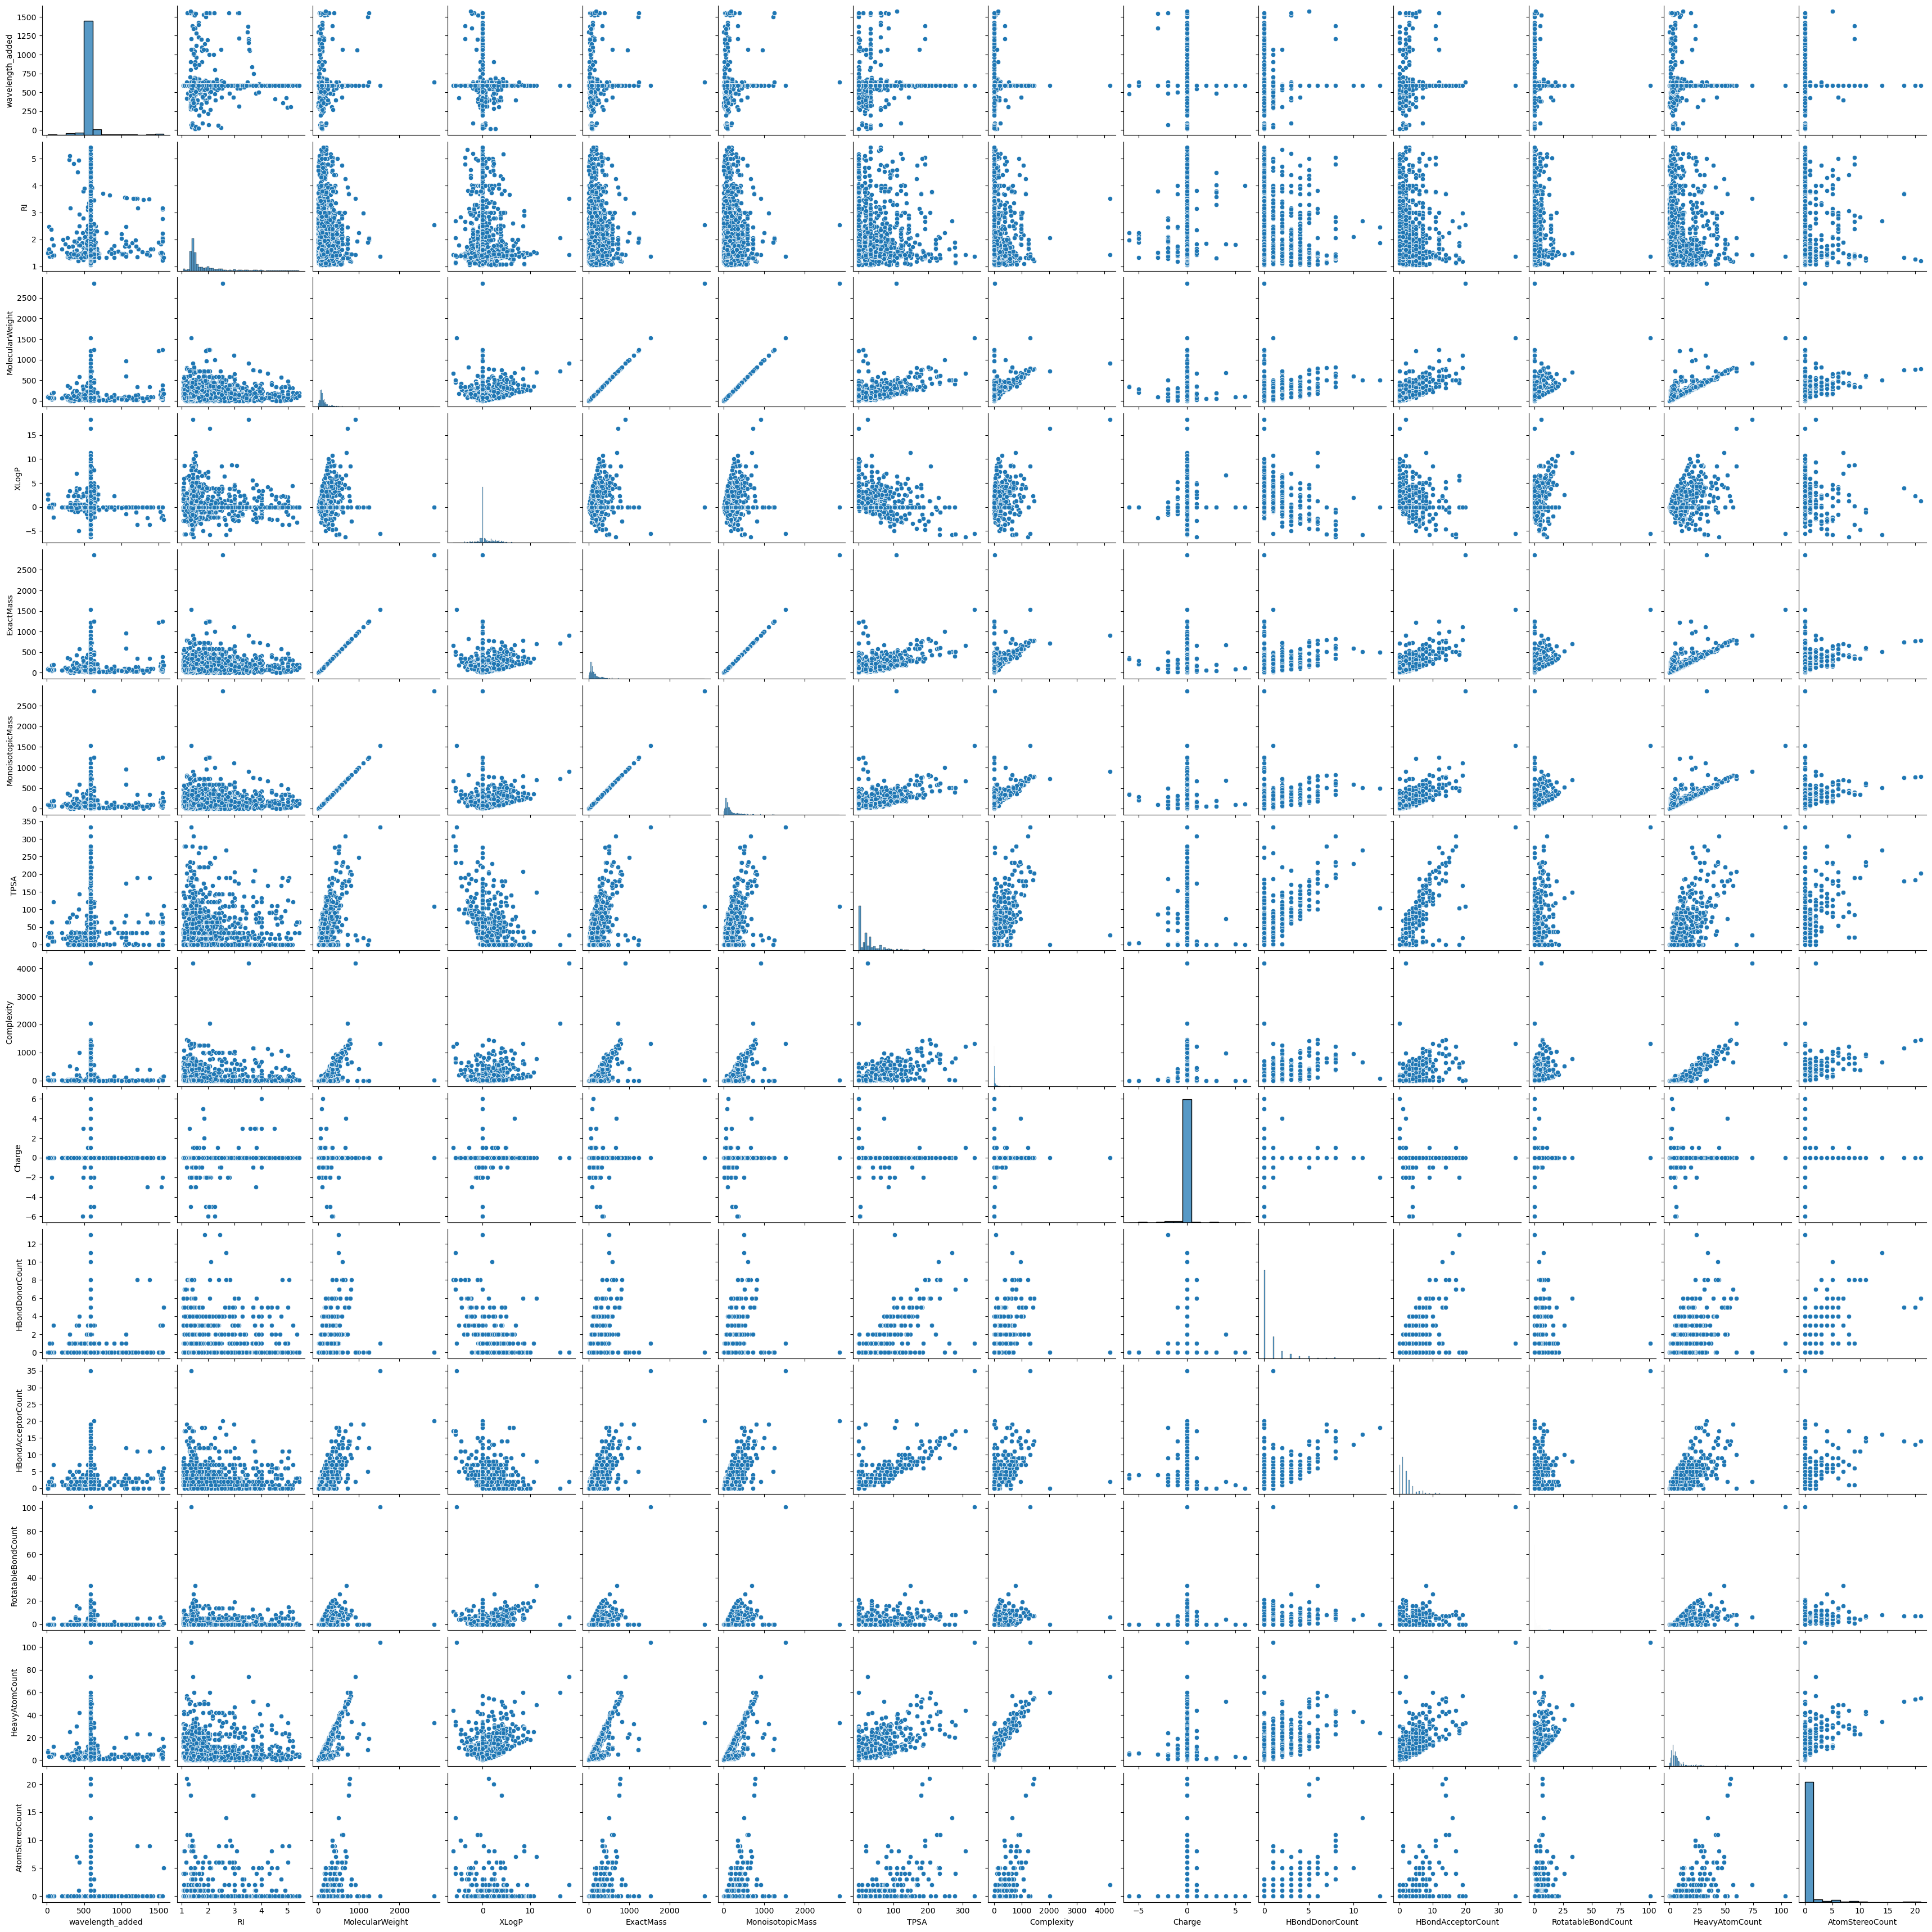

In [17]:
sns.pairplot(desc)

### Conclusions: 
Molecular weight, exact mass and monoisotopic mass got linear dependence (which is logical). 
Heavy atom cout also depends linearly on molecular weight, exact mass and monoisotopic mass and on complexity.

Now let's see how accurately these descriptors were calculated using all 4 methods.

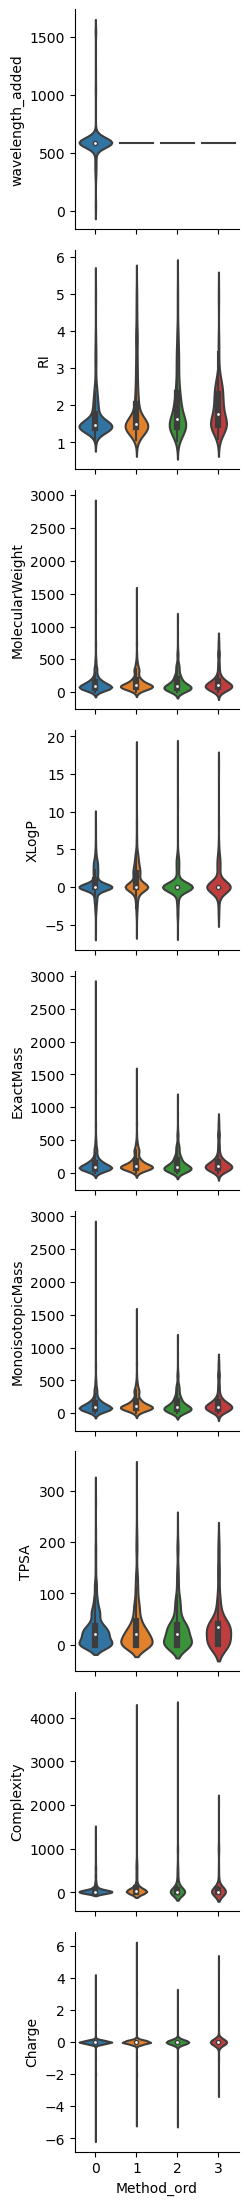

In [114]:
#Building a violin diagram
g = sns.PairGrid(data=df, x_vars= ['Method_ord'], y_vars= ['wavelength_added', 'RI','MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge'])
g.map(sns.violinplot) 
plt.show()

### Conclusions: 
Method 0 is the most accurate and vastly used. 

In [18]:
fig = px.scatter(data, x=df["wavelength_added"], y=df["RI"], size=df["ExactMass"], color=df['Method_ord'], size_max=60)
 # build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



### Conclusions: 
Most of the molecules in our dataset have wavelength of 600 with RI from 1 to 2. 
The wavelength obtained by the 0 method is much more often than the rest is greater or less than 600.

## Statistics 

In [19]:
from scipy.stats import f_oneway

Met1 = df[df["Method_ord"] == 0]["RI"]
Met2 = df[df["Method_ord"] == 1]["RI"]
Met3 = df[df["Method_ord"] == 2]["RI"]
Met4 = df[df["Method_ord"] == 3]["RI"]

stat, p = f_oneway(Met1, Met2, Met3, Met4)
print('stat={0:.3f}, p={1:.3f}'.format(stat, p))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.551, p=0.000
Probably different distributions


The distributions are different, so we can assume that the method affects the values of refractive index.

In [20]:
from scipy.stats import shapiro
data = df.loc[:,'RI']
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.695, p=0.695
Probably not Gaussian


The H0 was: the sample has a Gaussian distribution. So the H1: the sample does not have a Gaussian distribution
Our distribution is not normal.

We assumed the dependence of the mass of the molecule and the refractive index, we will test this hypothesis

In [21]:
#Extract required columns, ideally it should be two columns at a time
data=df[['RI', 'ExactMass']]
#Create a cross tab which is a contigency table
data_cont=pd.crosstab(data['RI'], data['ExactMass'])
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(data_cont)
#interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:

    print('Dependent (reject H0)')

else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Values are independent, our hypothesis has not been confirmed.

In [22]:
#Calculate the correlation coefficients using Spearman
df_corr = df.corr(method='spearman')
df_corr_tr = df_corr.abs().where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
df_corr_tr

C:\Users\user\AppData\Local\Temp\ipykernel_9768\3169394475.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,wavelength_added,RI,Method_ord,Publisher_ord,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
wavelength_added,NaN,0.019432,0.040779,0.026416,0.025607,0.005241,0.025701,0.025675,0.016550,0.003367,...,0.019186,0.000193,0.000849,0.007462,0.009649,0.004014,0.003951,0.003780,0.017885,0.002516
RI,NaN,NaN,0.145613,0.019870,0.193884,0.032989,0.193567,0.193573,0.056644,0.143484,...,0.383502,0.353456,0.400984,0.391151,0.416582,0.337721,0.331234,0.334678,0.377106,0.418468
Method_ord,NaN,NaN,NaN,0.348038,0.044586,0.018080,0.043888,0.043872,0.013152,0.040522,...,0.106486,0.122693,0.110532,0.121195,0.127639,0.083529,0.081199,0.081652,0.104392,0.120936
Publisher_ord,NaN,NaN,NaN,NaN,0.006090,0.008109,0.006895,0.006897,0.040039,0.016372,...,0.076021,0.070307,0.080298,0.065543,0.069593,0.063635,0.063268,0.063527,0.075450,0.066919
MolecularWeight,NaN,NaN,NaN,NaN,NaN,0.175303,0.999693,0.999691,0.308463,0.560108,...,0.042101,0.080384,0.088818,0.018275,0.008111,0.174124,0.181437,0.179753,0.053342,0.034413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.997455,0.997949,0.932991,0.862390
As,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999647,0.912628,0.856578
Vs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914985,0.860819
Ks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837687


<AxesSubplot: >

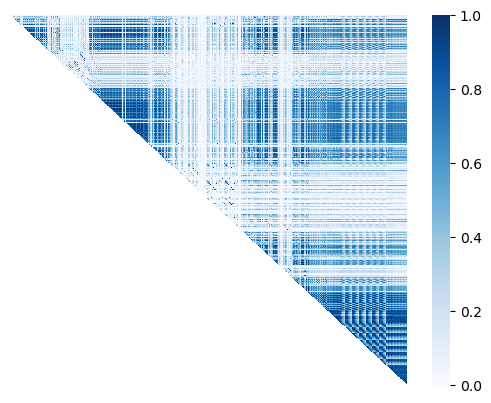

In [24]:
sns.heatmap(df_corr_tr, cmap="Blues", xticklabels=False, yticklabels=False)

We can say that many of the variables correlate strongly with each other.

             VIF           feature
0       2.593787  wavelength_added
1  123139.037373   MolecularWeight
2       1.828261             XLogP
3  122957.120484         ExactMass
4       3.815556              TPSA
5       3.141809        Complexity
6       1.040613            Charge


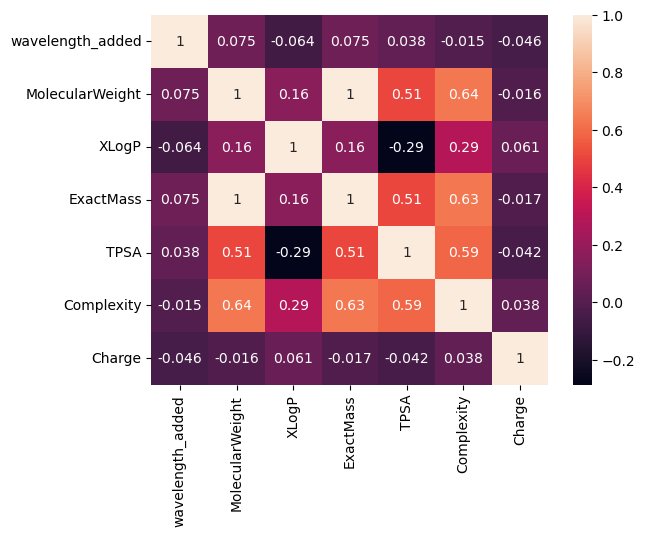

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

# selection of predictors and target variable
X = violin[['wavelength_added','MolecularWeight', 'XLogP', 'ExactMass', 'TPSA', 'Complexity', 'Charge']]
y = violin['RI']

# construction of the correlation matrix
corr = X.corr()

# visualization of the correlation matrix
sns.heatmap(corr, annot=True)

# determination of VIF (variation inflation factor) values for each predictor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns

print(vif)

High VIF values, as well as some correlation values, may indicate multicollinearity

In [34]:
#ICA

# Data
X, Y = df.drop(["RI"], axis=1), df[["RI"]].values.flatten()

#Import required libraries
from sklearn.decomposition import FastICA

# perform ICA
ica = FastICA(n_components=20)
ICA_x = ica.fit_transform(X)

# calculate explained variance for components
ica_explained_variance = np.var(ICA_x, axis=0)

# calculate cumulative variance
explained_variance_ratio = ica_explained_variance / np.sum(ica_explained_variance)
y = np.cumsum(explained_variance_ratio)

# calculate principal components
princ_comp = np.arange(1, y.shape[0]+1, step=1)

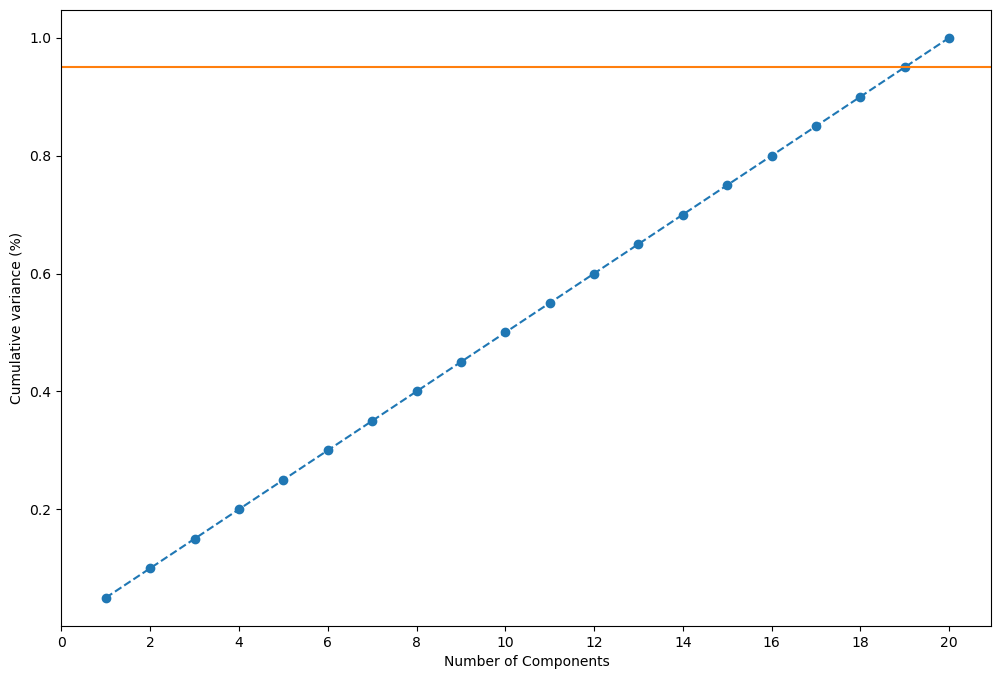

In [39]:
colors = ['#1f77b4', '#ff7f0e']
# plot results for cumulative variance
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(princ_comp, y, marker='o', linestyle='--', color=colors[0])
plt.xlabel('Number of Components')
plt.axhline(y=0.95, color=colors[1], linestyle='-')
plt.xticks(np.arange(0, 21, step=2))
plt.ylabel('Cumulative variance (%)')
plt.show()

In [36]:
#Combine the original data (X_pubchem) and first three PCs
df_ica = pd.DataFrame(data = ICA_x, columns = [f'ICA{i}' for i in range(1,21)])
df_col = pd.concat([df_ica[['ICA4', 'ICA5', 'ICA6']], pd.DataFrame(X[['wavelength_added','MolecularWeight', 'XLogP', 'ExactMass', 'TPSA', 'Complexity', 'Charge']], columns=X[['wavelength_added','MolecularWeight', 'XLogP', 'ExactMass', 'TPSA', 'Complexity', 'Charge']].columns)], axis=1)
df_col

,ICA4,ICA5,ICA6,wavelength_added,MolecularWeight,XLogP,ExactMass,TPSA,Complexity,Charge
0,0.005462,-0.004709,-0.010272,0.369181,0.062409,0.232653,0.062375,0.110479,0.015990,0.500000
1,-0.048568,-0.016303,0.000122,0.369181,0.071378,0.253061,0.071378,0.011976,0.000000,0.083333
2,0.009160,-0.001807,-0.000429,0.369181,0.032264,0.363265,0.032239,0.000000,0.010024,0.500000
3,0.004828,-0.001972,0.002093,0.369181,0.021039,0.253061,0.020999,0.102096,0.004296,0.500000
4,0.007867,-0.005323,-0.000759,0.369181,0.026647,0.334694,0.026625,0.000000,0.005967,0.500000
...,...,...,...,...,...,...,...,...,...,...
2968,0.006669,-0.007339,-0.010208,0.369181,0.035086,0.432653,0.035062,0.000000,0.004535,0.500000
2969,0.009784,-0.002311,-0.000856,0.007705,0.027966,0.253061,0.027993,0.102096,0.004296,0.500000
2970,0.005549,-0.007616,0.007813,0.369181,0.030853,0.240816,0.030835,0.055389,0.006205,0.500000
2971,0.010096,-0.002156,-0.000851,0.369181,0.027966,0.253061,0.027993,0.102096,0.004296,0.500000


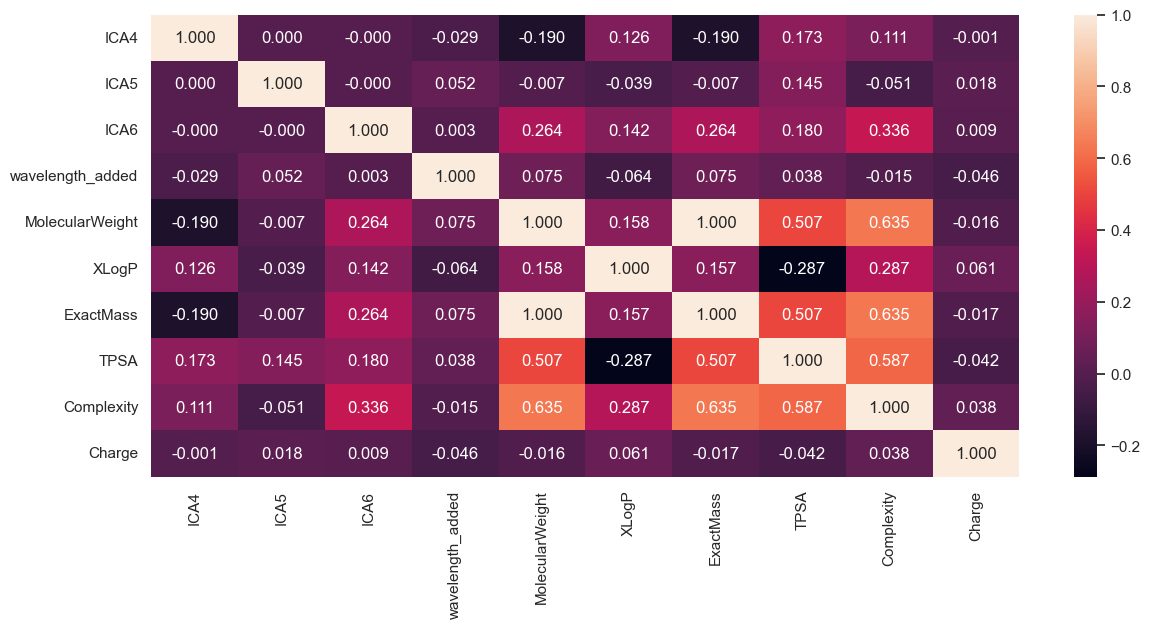

<Figure size 2800x1800 with 0 Axes>

In [40]:
#Compute the correlations between the original data and PCs
corMatrix = pd.DataFrame.corr(df_col)

#Plot the results
sns.set(rc={'figure.figsize':(14,6)})
sns.heatmap(corMatrix, annot=True, fmt='.3f')
plt.figure(figsize=(28,18))
plt.show()

### Conclusions:


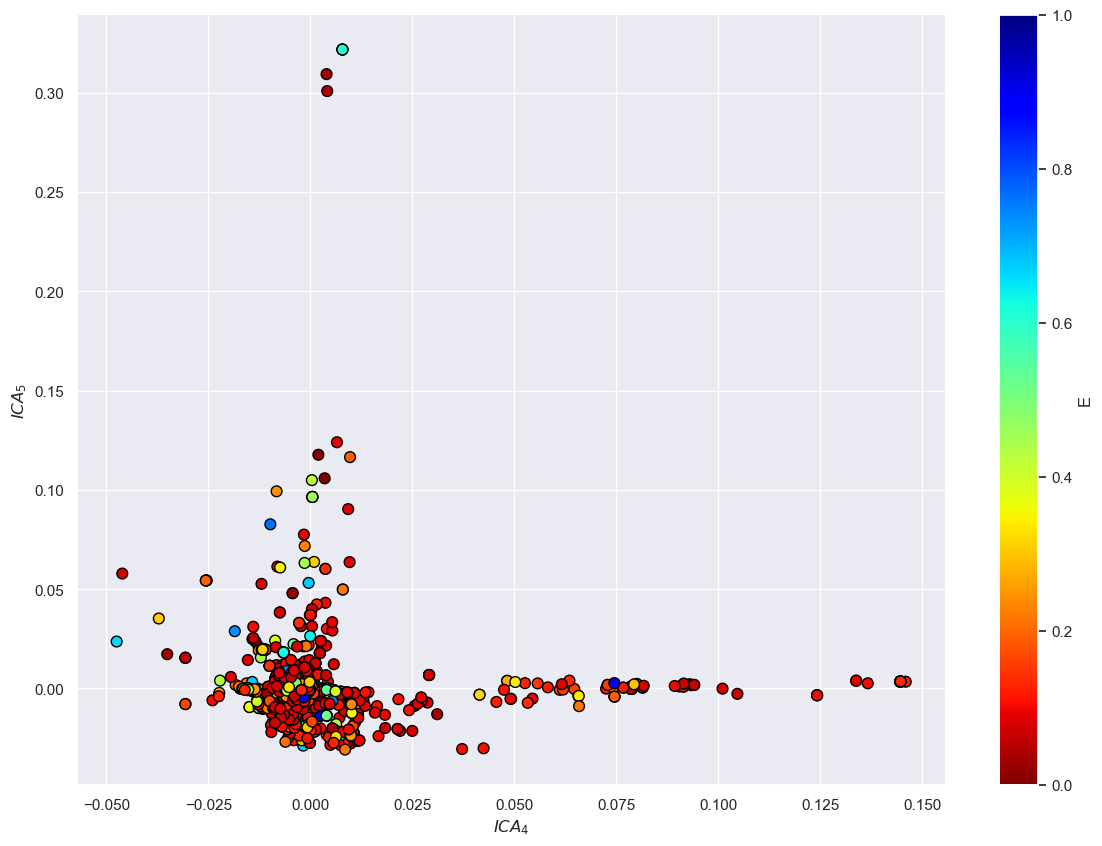

In [41]:
fig = plt.figure(figsize=(14,10))
ax  = fig.add_subplot(111)
scatter = ax.scatter(ICA_x[:, 4],ICA_x[:, 5], c = Y, s=60, edgecolors='black', cmap=cm.jet_r)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$ICA_4$')
plt.ylabel(r'$ICA_5$')
sns.despine()
plt.show()

In [43]:
num = df.select_dtypes(include='float64').columns
MMscaler = MinMaxScaler()
X = MMscaler.fit_transform(df[num])
tsne = TSNE(n_components=2, random_state=0)
tsne_fit= tsne.fit_transform(X)
tSNE_df = pd.DataFrame(data = tsne_fit, columns = ['tSNE1', 'tSNE2'])
tSNE_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tSNE1,tSNE2
0,-9.596452,-49.825062
1,-39.916695,53.397026
2,-11.906772,-5.113291
3,-13.996805,25.466961
4,-10.377389,7.752346
...,...,...
2968,-1.108782,-36.738434
2969,-68.167099,12.837049
2970,-0.879926,6.611324
2971,-67.332199,6.478185


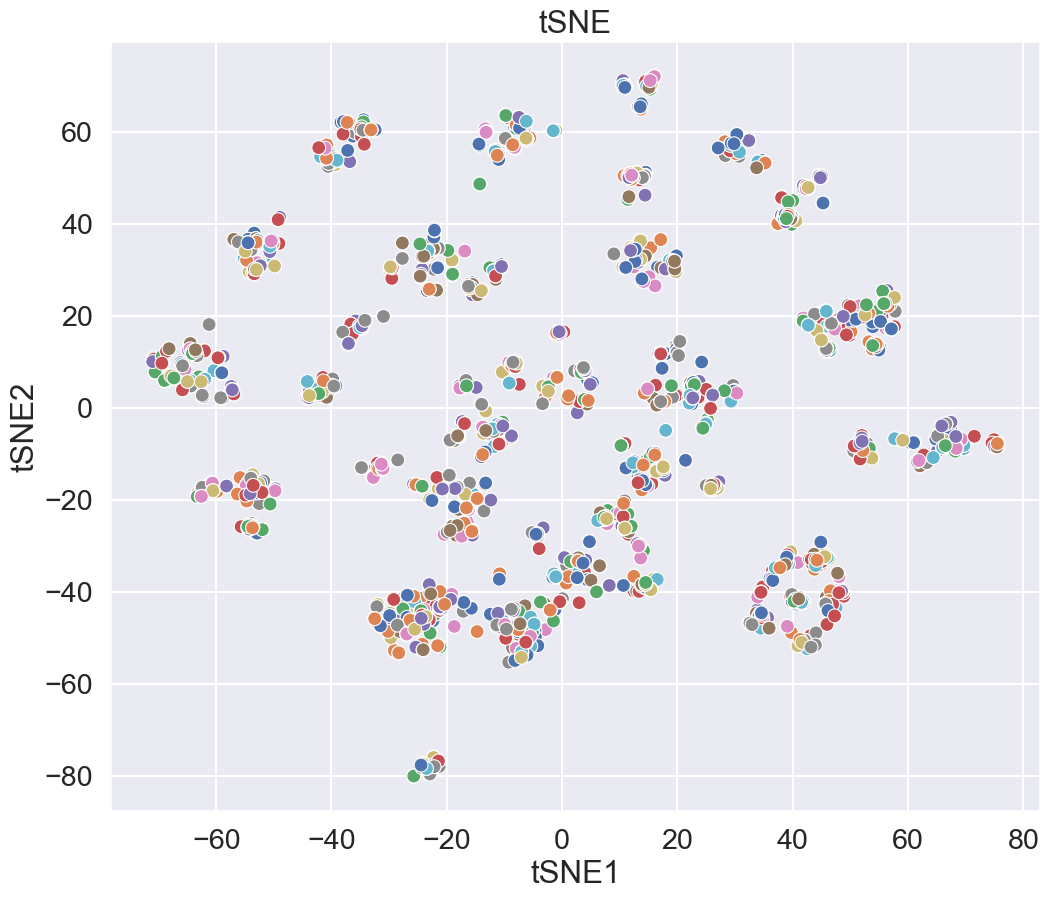

In [49]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="tSNE1", y="tSNE2", data=tSNE_df, hue = df['RI'], legend=False, s=100, palette= 'deep')
    plt.xlabel("tSNE1")
    plt.ylabel("tSNE2")
    plt.title("tSNE")